# Project: No show appointments dataset analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

● ‘ScheduledDay’ tells us on what day the patient set up their appointment.

● ‘Neighborhood’ indicates the location of the hospital.

● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

The questions I am going to ask are about the relation between the attributes in the dataset and whether the patient shows or not, for example one of the questions in mind is that:

    Q1: Does the gender affect the attendance at the clinic?
    
    Q2: Does being enrolled in the Brasilian welfare program affect the attendance at the clinic?
    
    Q3: Does being hypertensive affect the attendancce or not?
    
    Q4: Does being diabetic affect the attendance at the clinic?
    
    Q5: Does being alcoholic affect the attendance at the clinic?
    
    Q6: Does having a handicap affect the attendance at the clinic?
    
    Q7: Does being sent an SMS affect the attendance at the clinic?
    
    Q8: Does the age affect the attendance at the clinic?
    
    Q9: Does being close to a hospital affect attendance at the clinic?
    

In [14]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [15]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshow.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


here we find that there is no missing data

In [16]:
#Revealing the first instances of the data at hand
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
#Getting preliminary information about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Here we notice that:
        mean Age is equal to 37 years
        the minimum age is equal to -1 which does not make sense
        the maximum age is equal to 115 years

In [18]:
#Finding the number of patients(rows) and the number of attributes(columns)
df.shape

(110527, 14)

In [19]:
#Dropping unnecessary columns 
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [20]:
# renaming the "No-show" and "Hipertension" columns to fascilitate analysis
df.rename(columns={'No-show':'No_show', 'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [21]:
#Assigning names to show and no_show to fascilitate recalling process
show = df['No_show'] == 'No'
no_show = df['No_show'] == 'Yes'

In [22]:
#Getting the number of those who showed and those who didn't
df.No_show[show].count(), df.No_show[no_show].count()

(88208, 22319)

In [23]:
#Getting the count of the male and female patients
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

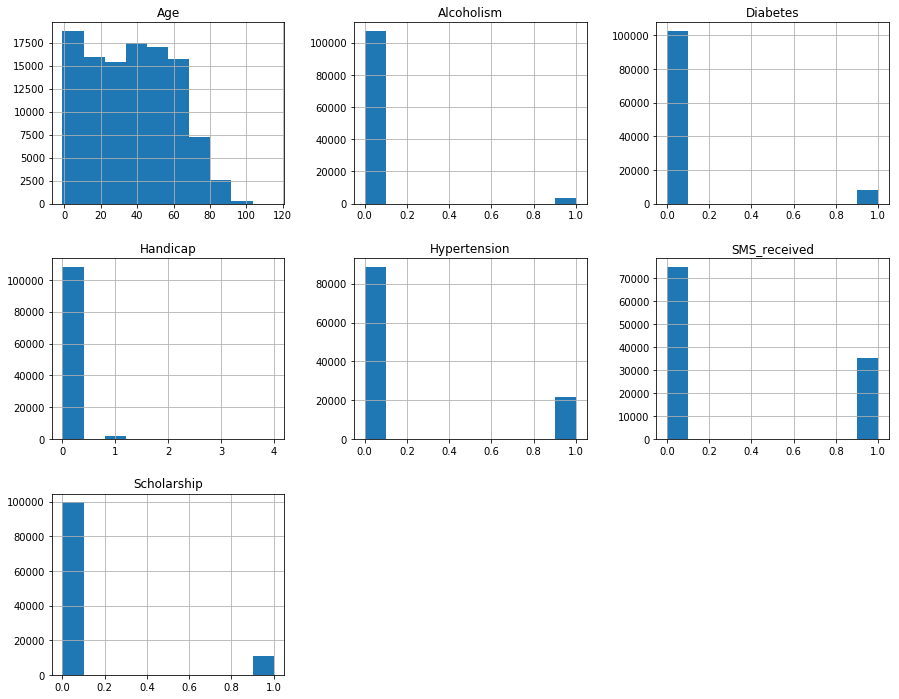

In [24]:
#Drawing histograms of the whole data set to ease the visualization of the data in general
df.hist(figsize=(15,12));

After looking to these histogram charts we notice that most of the patients are not diabetic, not hypertensive, not alcoholic,  not enrolled in the scholarship and did not receive an SMS to confirm the appointment

<a id='eda'></a>
## Exploratory Data Analysis


In [25]:
#Here I am creating a function that assigns x, y labels names and the graph title instead of repeating the process many times
def label(x, y, t):
    """
    Args:
    
    x (str): x-axis title
    y (str): y-axis title
    t (str): graph title
    
    Returns:
    None
    """
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()

### Q1: Does the gender affect the attendance at the clinic?

here we notice that those who showed are four times the number of those who did not show.

here we notice that most of the patients are females.

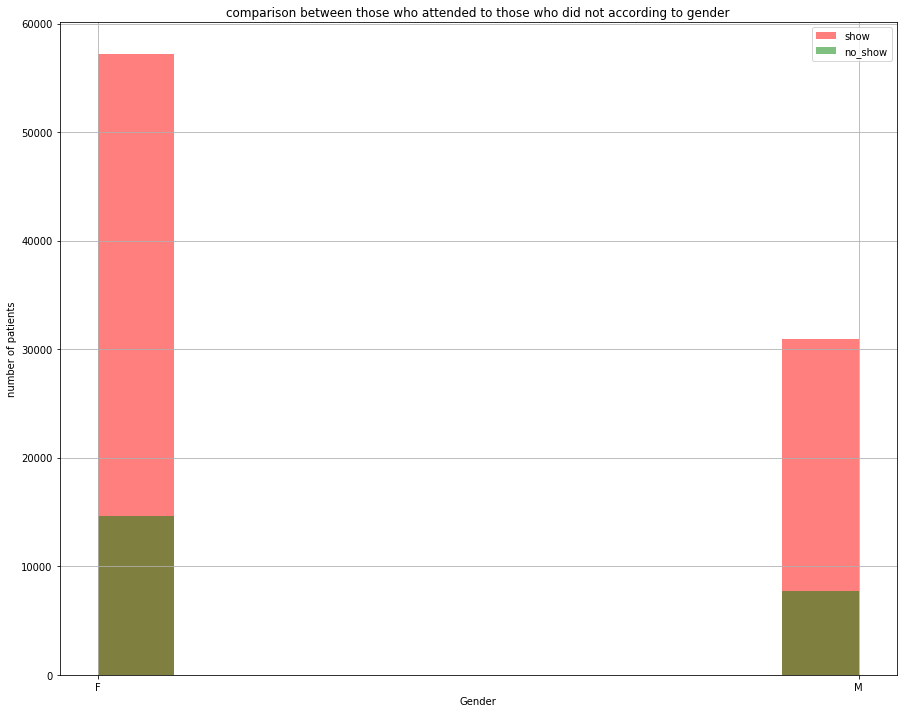

In [27]:
#Plotting a histogram to compare between those who attended to those who did not according to gender
plt.figure(figsize=(15,12));  #assigning the size of the graph
df.Gender[show].hist(alpha=0.5, label='show', color='red');
df.Gender[no_show].hist(alpha=0.5, label='no_show', color='green')
plt.legend();
label('Gender', 'number of patients', 'comparison between those who attended to those who did not according to gender');

In [28]:
print(df.Gender[show].value_counts())
print(df.Gender[no_show].value_counts())

F    57246
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


Above we can see the number of males and females who showed and those who did not show.
According to the numbers above we deduce that we can not rely on gender for analysis as the number of females is more than that of males.

Q2: Does being enrolled in the Brasilian welfare program affect the attendance at the clinic?

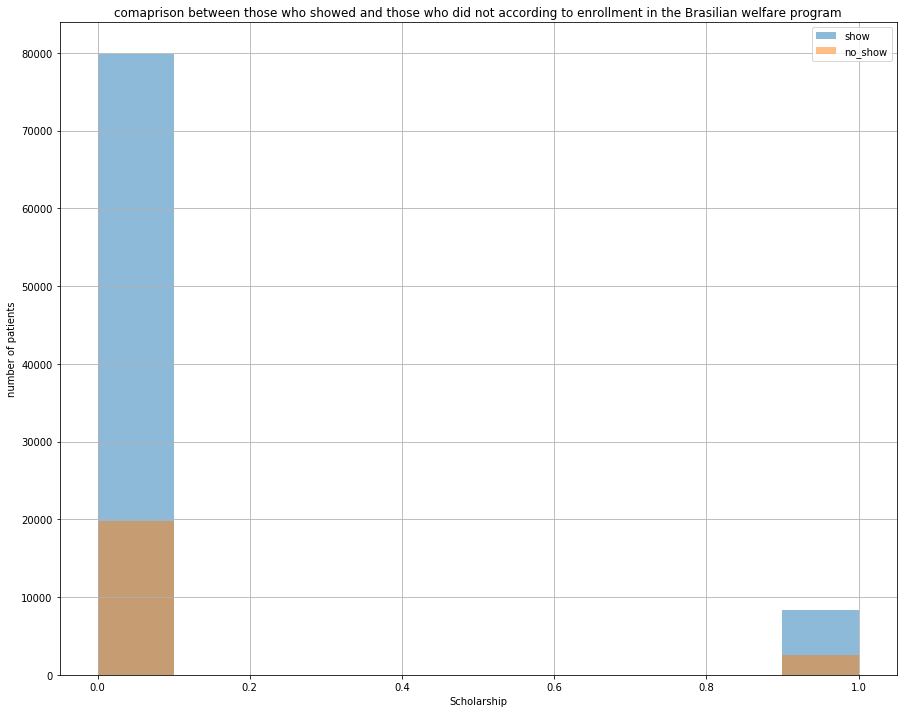

In [29]:
plt.figure(figsize=(15,12));
df.Scholarship[show].hist(alpha=0.5, label='show')
df.Scholarship[no_show].hist(alpha=0.5, label='no_show')
plt.legend();
label('Scholarship', 'number of patients', 'comaprison between those who showed and those who did not according to enrollment in the Brasilian welfare program');

In [30]:
print(df.Scholarship[show].value_counts())
print(df.Scholarship[no_show].value_counts())

0    79925
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


From the graph and info above we notice that most of the patients who showed were not enrolled in scholarship 

Q3: Does being hypertensive affect the attendance at the clinic?

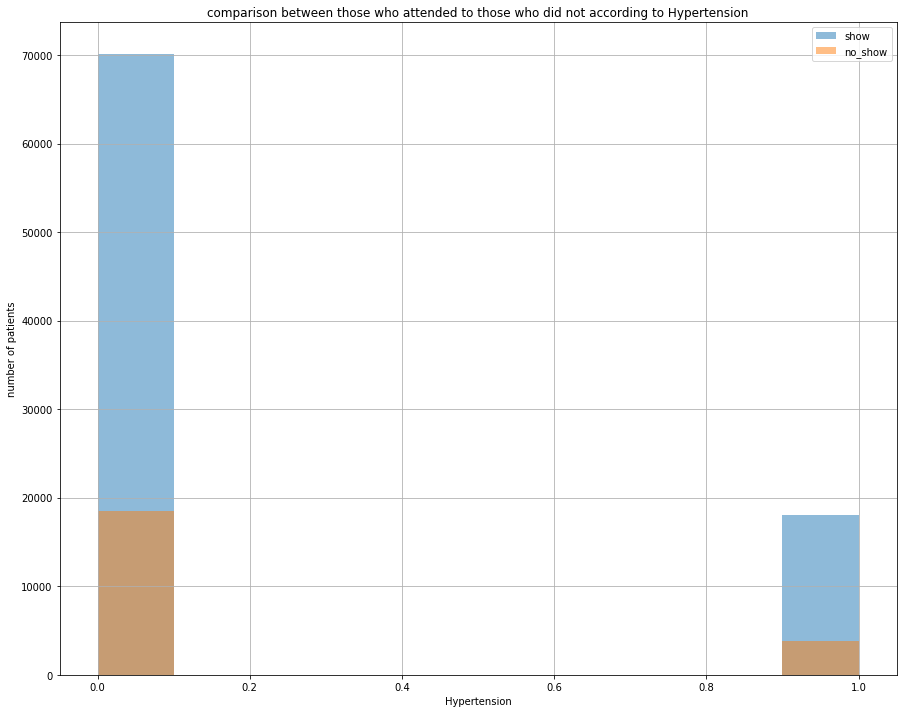

In [31]:
#Plotting a histogram to compare between those who attended to those who did not according to Hypertension
plt.figure(figsize=(15,12));  #assigning the size of the graph
df.Hypertension[show].hist(alpha=0.5, label='show');
df.Hypertension[no_show].hist(alpha=0.5, label='no_show')
plt.legend();
label('Hypertension', 'number of patients', 'comparison between those who attended to those who did not according to Hypertension');

In [32]:
print(df.Hypertension[show].value_counts())
print(df.Hypertension[no_show].value_counts())

0    70179
1    18029
Name: Hypertension, dtype: int64
0    18547
1     3772
Name: Hypertension, dtype: int64


According to the graph and the information below it we find that hypertension is not a factor affecting attendance

Q4: Does being diabetic affect the attendance at the clinic?

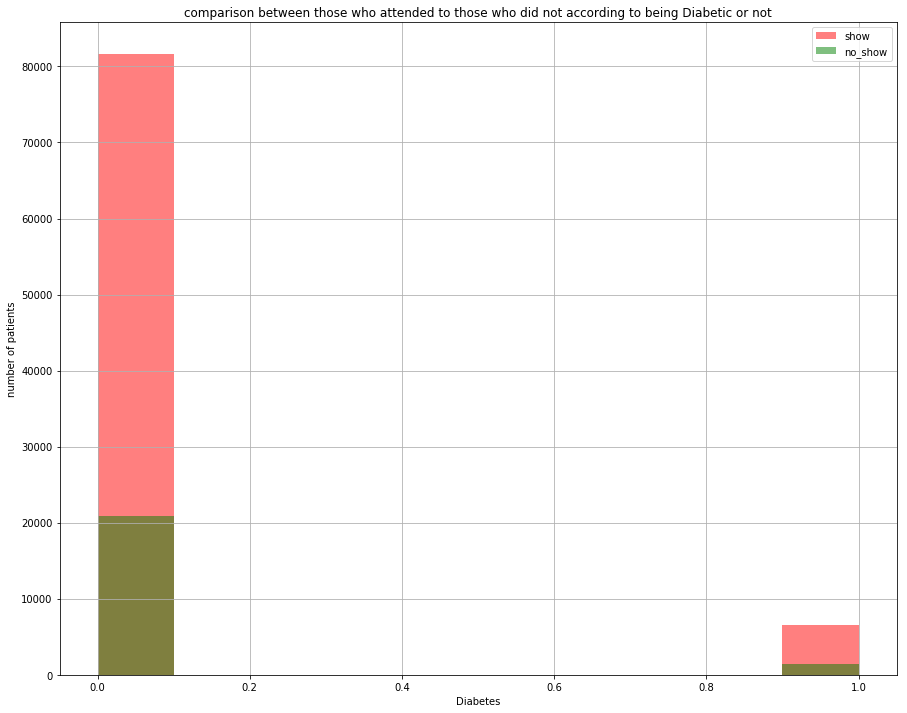

In [33]:
#Plotting a histogram to compare between those who attended to those who did not according to being Diabetic or not
plt.figure(figsize=(15,12));  #assigning the size of the graph
df.Diabetes[show].hist(alpha=0.5, label='show', color='red');
df.Diabetes[no_show].hist(alpha=0.5, label='no_show', color='green')
plt.legend();
label('Diabetes', 'number of patients', 'comparison between those who attended to those who did not according to being Diabetic or not');

In [34]:
print(df.Diabetes[show].value_counts())
print(df.Diabetes[no_show].value_counts())

0    81695
1     6513
Name: Diabetes, dtype: int64
0    20889
1     1430
Name: Diabetes, dtype: int64


According to the graph and the information below it we find that diabetes is not a factor affecting attendance

Q5: Does being alcoholic affect the attendance at the clinic?

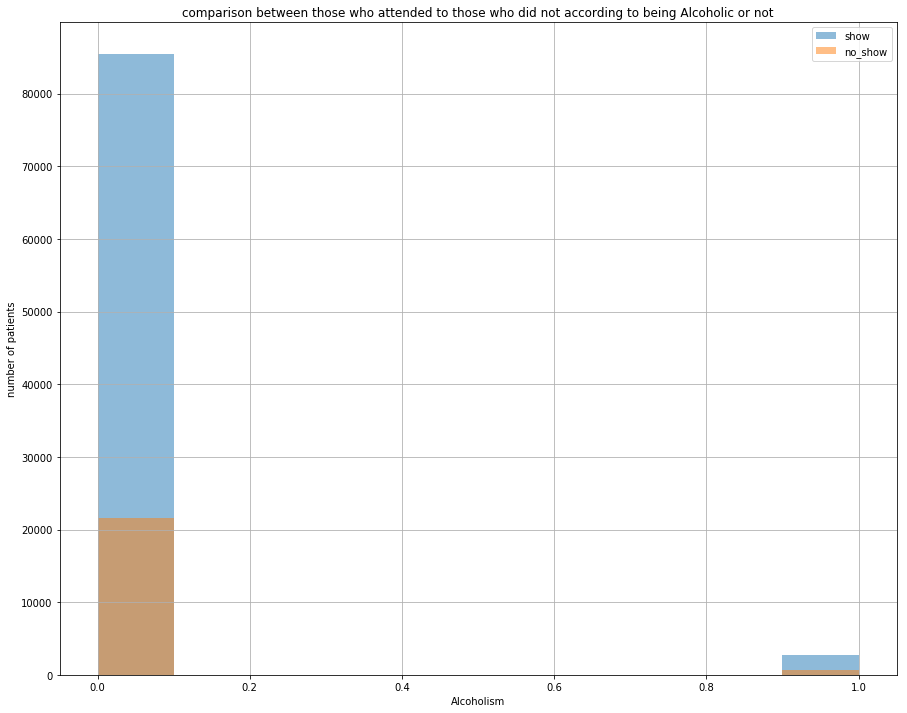

In [35]:
#Plotting a histogram to compare between those who attended to those who did not according to being Alcoholic or not
plt.figure(figsize=(15,12));  #assigning the size of the graph
df.Alcoholism[show].hist(alpha=0.5, label='show');
df.Alcoholism[no_show].hist(alpha=0.5, label='no_show')
plt.legend();
label('Alcoholism', 'number of patients', 'comparison between those who attended to those who did not according to being Alcoholic or not');

In [36]:
print(df.Alcoholism[show].value_counts())
print(df.Alcoholism[no_show].value_counts())

0    85525
1     2683
Name: Alcoholism, dtype: int64
0    21642
1      677
Name: Alcoholism, dtype: int64


According to the graph and the information below it we find that alcoholism is not a factor affecting attendance

Q6: Does having a handicap affect the attendance at the clinic?

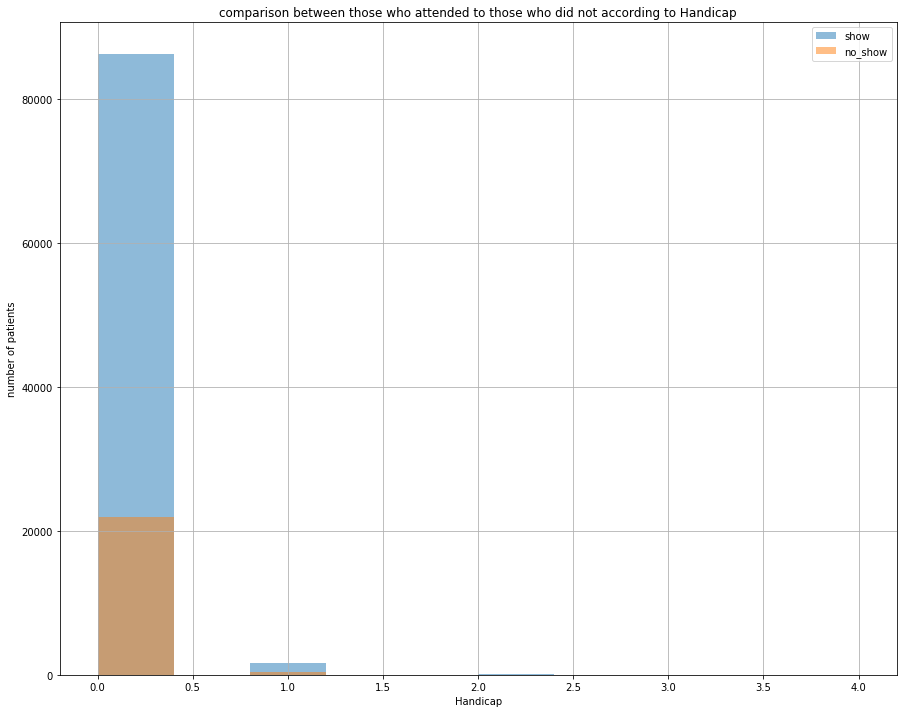

In [37]:
#Plotting a histogram to compare between those who attended to those who did not according to Handicap
plt.figure(figsize=(15,12));  #assigning the size of the graph
df.Handicap[show].hist(alpha=0.5, label='show');
df.Handicap[no_show].hist(alpha=0.5, label='no_show')
plt.legend();
label('Handicap', 'number of patients', 'comparison between those who attended to those who did not according to Handicap');

In [38]:
print(df.Handicap[show].value_counts())
print(df.Handicap[no_show].value_counts())

0    86374
1     1676
2      146
3       10
4        2
Name: Handicap, dtype: int64
0    21912
1      366
2       37
3        3
4        1
Name: Handicap, dtype: int64


According to the graph and the information below it we find that handicap is not a facotr affecting attendance

Q7: Does being sent an SMS affect the attendance at the clinic?

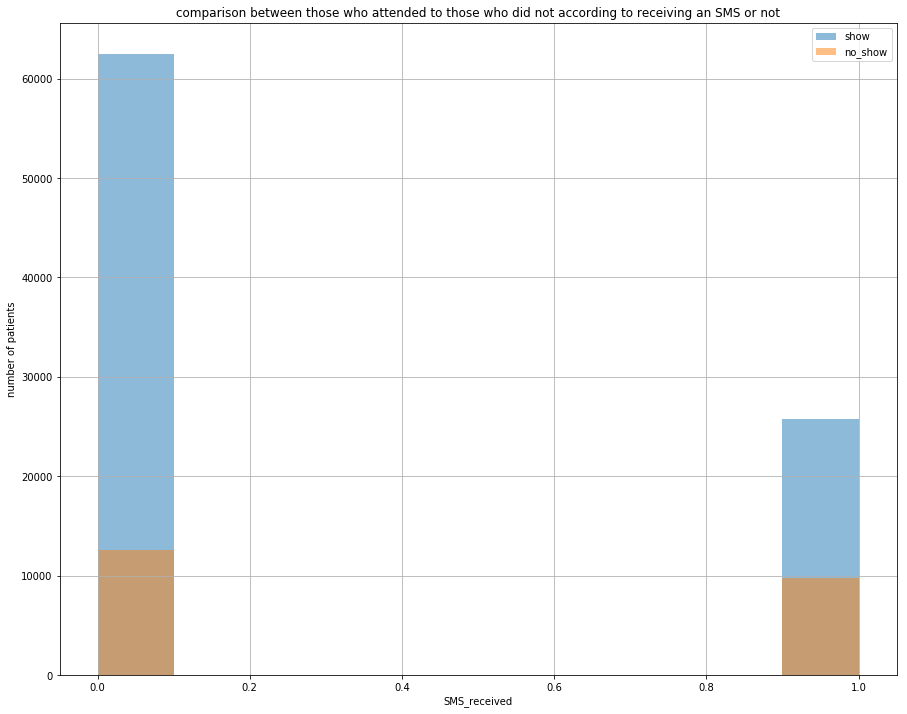

In [39]:
#Plotting a histogram to compare between those who attended to those who did not according to receiving an SMS or not
plt.figure(figsize=(15,12));  #assigning the size of the graph
df.SMS_received[show].hist(alpha=0.5, label='show');
df.SMS_received[no_show].hist(alpha=0.5, label='no_show')
plt.legend();
label('SMS_received', 'number of patients', 'comparison between those who attended to those who did not according to receiving an SMS or not');

In [40]:
print(df.SMS_received[show].value_counts())
print(df.SMS_received[no_show].value_counts())

0    62510
1    25698
Name: SMS_received, dtype: int64
0    12535
1     9784
Name: SMS_received, dtype: int64


According to the graph and the information below it we find that receiving an SMS is not a facotr affecting attendance

Q8: Does the age affect the attendance at the clinic

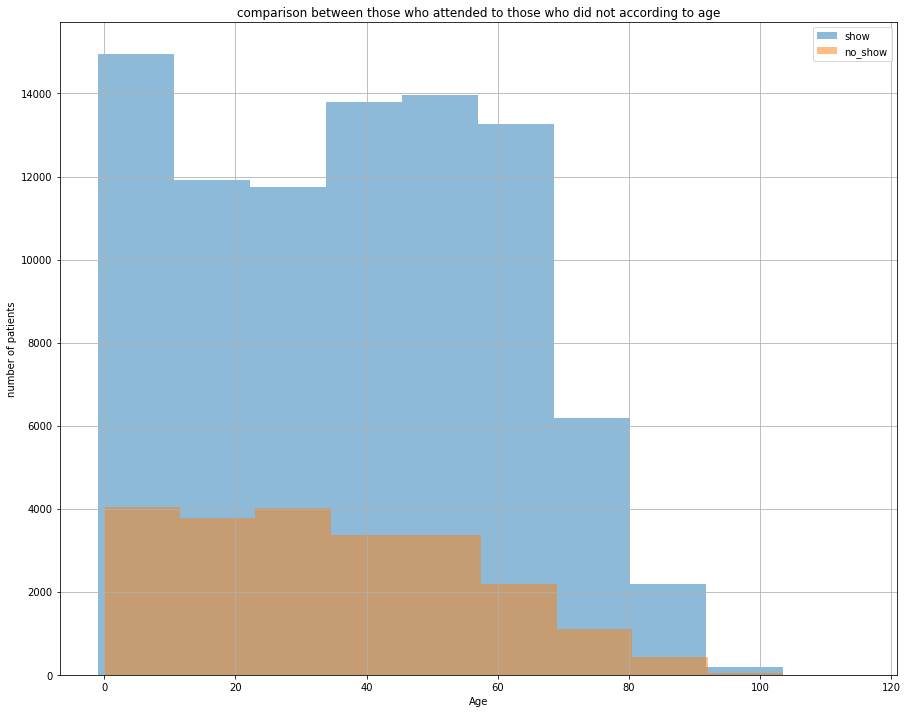

In [41]:
#Plotting a histogram to compare between those who attended to those who did not according to Age
plt.figure(figsize=(15,12))
df.Age[show].hist(alpha=0.5, label='show');
df.Age[no_show].hist(alpha=0.5, label='no_show');
plt.legend();
label('Age', 'number of patients', 'comparison between those who attended to those who did not according to age')

According to the graph we see that for those in the age range from 0 to 10 the attendance is huge,
from 11 to almost 35 there is a little decrease in attendance,
from 36 to almost 70 there is a little increase in attendance,
then from 71 to the end there is significant decrease in attendance.

Q9: Does being close to a hospital affect attendance at the clinic?

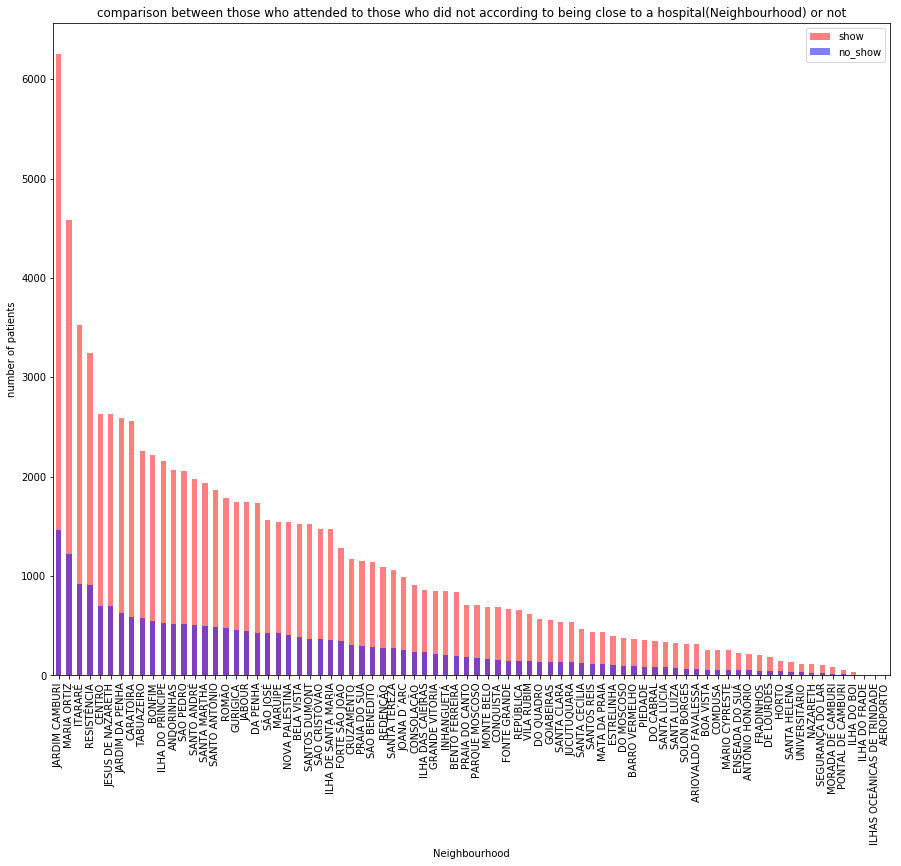

In [42]:
#Plotting a histogram to compare between those who attended to those who did not according to being close to a hospital(Neighbourhood) or not
plt.figure(figsize=(15,12))
df.Neighbourhood[show].value_counts().plot(kind= 'bar', alpha=0.5, label='show', color='red');
df.Neighbourhood[no_show].value_counts().plot(kind= 'bar', alpha=0.5, label='no_show', color='blue');
plt.legend();
label('Neighbourhood', 'number of patients', 'comparison between those who attended to those who did not according to being close to a hospital(Neighbourhood) or not');

According to the graph we notice that being close to a hospital affects the attendace

<a id='conclusions'></a>
## Conclusions

According to the findings from the performed analysis above we conclude that the gender, hypertension, diabetes, receiving SMS, scholarship, handcap, alcoholism these factors do not affect the attendance, while the only factor that had a direct effect was being close to a hospital or not(neighbourhood). Also, one of the obsevations had an age equal to -1 which does not make any sense.
